## Project: Wrangle and Analyze WeRateDogs Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>

<li><a href="#gd">Gather Data</a></li>
<li><a href="#ad">Assess Data </a></li>
<li><a href="#cd">Clean Data</a></li> 
<li><a href="#avd">Analyze and Visualize Data </a></li>
<li><a href="#f">Summary</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### About the data: three data sources are used in this project:
 > **1**. The tweet achive of Twitter user @ dog_rates, also known as WeRatedogs. This archive contains basic tweet data (tweet ID, timestamp,text,etc.) for all 5000+ of their tweets until Aug 1,2017.

 > **2**. Additional Data such as likes and retweets extracted via the Twitter API
   
 > **3**. Predictions of dog breeds based on their images. This is done by running every image through a neural network classifier built by Udacity.
   
#### Task: 
 > **1**. Wrangle and analyze the WeRateDogs datasets

 > **2**. Build at least three insights and create visualizations
   
 > **3**. Write two reports. One as an internal document which describes the wrangling maneuvor. The other as a magazine post for external use, which communicates the findings. 

<a id='gd'></a>
### Gather Data

In [1]:
#Import python libs for file downloads and data wrangling and analysis
import requests          
import pandas as pd     
import os                
import tweepy            
import numpy as np
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set pandas view option to see the entire text
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [7]:
#Download the image prediction file from the web and save it to the folder
img_folder='image_pred'
if not os.path.exists(img_folder):
    os.makedirs(img_folder)

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open(os.path.join(img_folder,url.split('/')[-1]),mode='wb') as f:
    f.write(r.content)

In [ ]:
#Load personal API keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True )

In [3]:
#Load the twitter archive file into the data frame
twitter_arch=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Load image_predictions file into the dataframe
image_pred=pd.read_csv('image-predictions.tsv',sep="\t")

In [13]:
#Add each tweet to a new line of tweet_json.text
fails={}
start_time=timer()
count=0
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in twitter_arch['tweet_id']:
        count+=1
        print(str(count)+" : "+str(tweet_id))
        try: 
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.TweepError as e:               
            fails[tweet_id]=e
            print('Fail'+str(tweet_id))
end_time=timer()
print(count)
print(end_time-start_time)
print(fails)

1 : 892420643555336193
2 : 892177421306343426
3 : 891815181378084864
4 : 891689557279858688
5 : 891327558926688256
6 : 891087950875897856
7 : 890971913173991426
8 : 890729181411237888
9 : 890609185150312448
10 : 890240255349198849
11 : 890006608113172480
12 : 889880896479866881
13 : 889665388333682689
14 : 889638837579907072
15 : 889531135344209921
16 : 889278841981685760
17 : 888917238123831296
18 : 888804989199671297
19 : 888554962724278272
20 : 888202515573088257
Fail888202515573088257
21 : 888078434458587136
22 : 887705289381826560
23 : 887517139158093824
24 : 887473957103951883
25 : 887343217045368832
26 : 887101392804085760
27 : 886983233522544640
28 : 886736880519319552
29 : 886680336477933568
30 : 886366144734445568
31 : 886267009285017600
32 : 886258384151887873
33 : 886054160059072513
34 : 885984800019947520
35 : 885528943205470208
36 : 885518971528720385
37 : 885311592912609280
38 : 885167619883638784
39 : 884925521741709313
40 : 884876753390489601
41 : 884562892145688576
42

In [5]:
#Load tweets data into dataframe
tweets=pd.read_json('tweet_json.txt',lines='true')

<a id='ad'></a>
### Assess Data

#### `image_pred`dataset:

In [6]:
#Check columns,datatypes and null values
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
#Sample data from image_pred
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
1076,717421804990701568,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,miniature_pinscher,0.286479,True,Italian_greyhound,0.084134,True,beagle,0.064697,True
1617,802323869084381190,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,4,home_theater,0.765069,False,television,0.203578,False,entertainment_center,0.018644,False
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True
1696,816450570814898180,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False


In [8]:
image_pred.p1.value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
malamute              30 
Name: p1, dtype: int64

In [9]:
image_pred.p2.value_counts()[:10]

Labrador_retriever          104
golden_retriever            92 
Cardigan                    73 
Chihuahua                   44 
Pomeranian                  42 
French_bulldog              41 
Chesapeake_Bay_retriever    41 
toy_poodle                  37 
cocker_spaniel              34 
miniature_poodle            33 
Name: p2, dtype: int64

In [10]:
image_pred.p3.value_counts()[:10]

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
beagle                       31
cocker_spaniel               31
Name: p3, dtype: int64

#### Quality issue 1: some breeds with the first letter capitalized, others not.

#### Quality issue 2: twitterID should be string not integer 

#### Quality issue 3: column names are not informative.

In [11]:
#How many predictions are not dogs?
image_pred.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [12]:
image_pred.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [13]:
image_pred.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

#### `twitter_arch`dataset:

In [14]:
#Check columns,datatypes and null values
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Quality issue 4:Timestamp and Retweet timestamp should be datetime, not object. All ids should be string not float

In [15]:
#Sample the data and get some feeling about the quality and tidiness
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692901601640583168/photo/1,10,10,None,None,None,None,None
1686,681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798867845120/photo/1,12,10,None,None,None,None,None
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 would happily…",8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326359670784/photo/1,12,10,Winston,None,None,None,None
985,749075273010798592,NaN,NaN,2016-07-02 03:00:36 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Boomer. He's self-baptizing. Other doggo not ready to renounce sins. 11/10 spiritually awakened af https://t.co/cRTJiQQk9o,NaN,NaN,NaN,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,None,None,None
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Odie. He falls asleep wherever he wants. Must be nice. 10/10 https://t.co/M9BXCSDVjh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/758405701903519748/photo/1,https://twitter.com/dog_rates/status/758405701903519748/photo/1,https://twitter.com/dog_rates/status/758405701903519748/photo/1,https://twitter.com/dog_rates/status/758405701903519748/photo/1",10,10,Odie,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
1308,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707297311098011648/photo/1,https://twitter.com/dog_rates/status/707297311098011648/photo/1",10,10,Cassie,None,None,None,None
1612,685321586178670592,NaN,NaN,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685321586178670592/photo/1,10,10,Rocky,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's a Benebop Cumberplop. 12/10 would hold against my face https://t.co/4yXa801fgl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190421639168/photo/1,12,10,Lucy,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Major. He put on a tie for his first real walk. Only a little crooked.

#### Tidiness issue 1: Dog stages should be one column with 5 possible outcomes (4 stages and None). Data type for the new column "stage" should be categorical

#### Quality issue 5: There are retweets which we don't need

#### Quality issue 6: There are many columns irrelevant to the analysis

In [16]:
#Check dog names 
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

#### Quality issue 7: Some names are captured wrong. Get a list of names without the first letter capitalized. They don't look like dog names.

In [17]:
nl=list(twitter_arch.name.unique())
name_error=[]
for n in nl:
    if n[0].islower():
        name_error.append(n)
        print(n)        

such
a
quite
not
one
incredibly
mad
an
very
just
my
his
actually
getting
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [18]:
#Double check why the name is wrong. These are tweets without a name specified. They should be None instead
twitter_arch[twitter_arch.name.isin(name_error)][['name','text']]

,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
542,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
682,mad,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX


In [19]:
#Check the distribution of dog ratings
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### Quality Issue 8: There are errors in numerator column.

In [20]:
twitter_arch.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

#### Quality Issue 9: There are errors in denominator column

In [21]:
#check duplicated data
twitter_arch.duplicated().sum()

0

In [22]:
#How many dogs with no stage records? 
len(twitter_arch[(twitter_arch.doggo=='None') & (twitter_arch.floofer=='None') 
             & (twitter_arch.pupper=='None') &(twitter_arch.puppo=='None')])

1976

In [23]:
#source is illegible. Check what information we can find there.
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

#### Quality issue 10: source information needs to be cleaned up. It should show which application/device people used to access twitter

#### `tweets`dataset:

In [24]:
#Check columns,datatypes and null values
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
created_at                       2330 non-null datetime64[ns, UTC]
id                               2330 non-null int64
id_str                           2330 non-null int64
full_text                        2330 non-null object
truncated                        2330 non-null bool
display_text_range               2330 non-null object
entities                         2330 non-null object
extended_entities                2058 non-null object
source                           2330 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
in_reply_to_screen_name          77 non-null object
user                             2330 non-null object
geo                              0 non-null float64
coordinates                 

In [25]:
tweets.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1537,2016-01-16 15:40:14+00:00,688385280030670848,688385280030670848,This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 688385255020036098, 'id_str': '688385255020036098', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CY2ivgIWAAIPQzF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CY2ivgIWAAIPQzF.jpg', 'url': 'https://t.co/vz2DukO0th', 'display_url': 'pic.twitter.com/vz2DukO0th', 'expanded_url': 'https://twitter.com/dog_rates/status/688385280030670848/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 882, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 882, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 586, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 688385255020036098, 'id_str': '688385255020036098', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CY2ivgIWAAIPQzF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CY2ivgIWAAIPQzF.jpg', 'url': 'https://t.co/vz2DukO0th', 'display_url': 'pic.twitter.com/vz2DukO0th', 'expanded_url': 'https://twitter.com/dog_rates/status/688385280030670848/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 882, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 882, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 586, 'h': 680, 'resize': 'fit'}}}, {'id': 688385265241575426, 'id_str': '688385265241575426', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg', 'url': 'https://t.co/vz2DukO0th', 'display_url': 'pic.twitter.com/vz2DukO0th', 'expanded_url': 'https://twitter.com/dog_rates/status/688385280030670848/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 898, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 898, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 596, 'h': 680, 'resize': 'fit'}}}, {'id': 688385268521525249, 'id_str': '688385268521525249', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CY2iwSbWYAEiwzj.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CY2iwSbWYAEiwzj.jpg', 'url': 'https://t.co/vz2DukO0th', 'display_url': 'pic.twitter.com/vz2DukO0th', 'expanded_url': 'https://twitter.com/dog_rates/status/688385280030670848/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 554, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 834, 'h': 1024, 'resize': 'fit'}, 'large': {'w': 834, 'h': 1024, 'resize': 'fit'}}}, {'id': 688385268353728512, 'id_str': '688385268353728512', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CY2iwRzWAAA6qeO.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CY2iwRzWAAA6qeO.jpg', 'url': 'https://t.co/vz2DukO0th', 'display_url': 'pic.twitter.com/vz2DukO0th', 'expanded_url': 'https://twitter.com/dog_rates/status/688385280030670848/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 453, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 575, 'h': 863, 'resize': 'fit'}, 'large': {'w': 575, 'h': 863, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Sour

In [26]:
#Look at the statistics for quantitative variables
tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.330000e+03,2.330000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2330.000000,2330.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419336e+17,7.419336e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2724.365236,7620.269528,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823506e+16,6.823506e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4608.763163,11825.309219,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782612e+17,6.782612e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,549.500000,1330.750000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1278.000000,3315.500000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986712e+17,7.986712e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3168.250000,9345.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,78432.000000,157582.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [27]:
#Most of the tweets are in english so there is probably not many insights we can get from this column
tweets.lang.value_counts()

en     2312
und    7   
nl     3   
in     3   
ro     1   
eu     1   
es     1   
tl     1   
et     1   
Name: lang, dtype: int64

#### Quality Issue 11: TwitterId should be string not integer

#### Tidiness issue 2: `favorite_count` and `retweet_count`should be part of the `Twitter_arch` table. 

#### Summary:
Quality

`twitter_arch`

- Timestamp and Retweet timestamp should be datetime, not object. All ids should be string not float. 
- Remove the retweets.
- Remove the columns irrelevant to the analysis.
- Correct the wrongly captured names and remove those that cannot be fixed.
- Correct the wrongly captured numerator and denominator ratings and remove those that cannot be fixed.
- Source information needs to be cleaned up. It should show which application/device people used to access twitter.
- Dog stages are wrongly captured.

`image_pred`
- Some breeds with the first letter capitalized, others not. Change all breed names to lowercase and remove the "-" dash in between.
- tweet_id should be string not integer.
- Column names 'p1','p2','p3','p1-dog','p2-dog',and 'p3-dog' are not informative. Rename them.

`tweets`
- Ids should be string not integer.

Tidiness

`twitter_arch`
- Dog stages should be one column with 5 possible outcomes (4 stages and None). Data type for the new column "stage" should be categorical.

- All three datasets should be merged into one on twitter_id

<a id='cd'></a>
### Clean Data

In [28]:
#make a copy for each dataset:
twitter_arch_clean=twitter_arch.copy()
image_pred_clean=image_pred.copy()
tweets_clean=tweets.copy()

#### `twitter_arch_clean`

**Define:**

Remove the retweets

**Code:**

In [29]:
twitter_arch_clean=twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.isnull()]
twitter_arch_clean=twitter_arch_clean[~twitter_arch_clean.text.str.contains('RT @')]

**Test:**

In [30]:
twitter_arch_clean.in_reply_to_status_id.notnull().sum()

0

In [31]:
len(twitter_arch_clean[twitter_arch_clean.text.str.contains('RT @')])

0

**Define:**

Drop the irrelevant columns

**Code:**

In [32]:
#Drop the columns irrelevant to the analysis
twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1,inplace=True)

**Test:**

In [33]:
#double check the columns
list(twitter_arch_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Define:**

Change tweet_id datatype to string

**Code:**

In [34]:
#Correct the datatypes
twitter_arch_clean.tweet_id=twitter_arch_clean.tweet_id.astype(str)

**Test:**

In [35]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(9)
memory usage: 196.6+ KB


**Define:**

Remove the +0000 in timestamp column and change the datatype to datetime

**Code:**

In [36]:
#Remove the +0000 in timestamp
twitter_arch_clean.timestamp=twitter_arch_clean.timestamp.apply(lambda x: x[:-5])

In [37]:
#Change the datatype to datetime
twitter_arch_clean.timestamp=pd.to_datetime(twitter_arch_clean.timestamp,format='%Y/%m/%d %H:%M:%S')

**Test:**

In [38]:
twitter_arch_clean.timestamp.sample(5)

1045   2016-06-17 00:05:25
995    2016-06-30 02:45:28
2096   2015-11-29 00:06:39
410    2017-01-23 00:13:17
1924   2015-12-08 03:57:26
Name: timestamp, dtype: datetime64[ns]

**Define:**

Correct the wrong names. Change those in the error list to 'None'

**Code:**

In [39]:
#Correct the wrongly catpured names: change those in the error list to None
twitter_arch_clean.name=twitter_arch_clean.name.apply(lambda x: 'None' if x in (name_error) else x)

**Test:**

In [40]:
#Double check whether erroneous names are changed to None

len(twitter_arch_clean[twitter_arch_clean.name.isin(name_error)])

0

**Define:**

Correct the errors in numerators and denominators. Set all denominators to 10 and scale the numerators accordingly.Name the clean rating column as 'rating'.

**Code**:

In [41]:
#First look at the non-standardized denominators. i.e. those not equal to 10
twitter_arch_clean.query('rating_denominator!=10')[['text','rating_numerator',
                                                     'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [42]:
#Correct the wrongly captured scores and          
twitter_arch_clean.loc[1202,['rating_numerator','rating_denominator']]=(11,10)
twitter_arch_clean.loc[1662,['rating_numerator','rating_denominator']]=(10,10)
twitter_arch_clean.loc[2335,['rating_numerator','rating_denominator']]=(9,10)           
twitter_arch_clean.loc[1068,['rating_numerator','rating_denominator']]=(14,10) 
twitter_arch_clean.loc[1165,['rating_numerator','rating_denominator']]=(13,10) 

In [43]:
#Remove the entry without rating
twitter_arch_clean=twitter_arch_clean[(twitter_arch_clean.rating_numerator!=24)]

In [44]:
#Double check before the standardization 
twitter_arch_clean.query('rating_denominator!=10')[['text','rating_numerator',
                                                     'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


In [45]:
#Standardize the denominator by setting it to 10 and scaling the numerator
twitter_arch_clean['rating']=twitter_arch_clean.apply(lambda x: int(10*x.rating_numerator/x.rating_denominator) if (x.rating_denominator!=10) else
                                                             x.rating_numerator,axis=1)

In [46]:
#The standardization looks good
twitter_arch_clean.query('rating_denominator!=10')[['rating','rating_numerator','rating_denominator']]

,rating,rating_numerator,rating_denominator
433,12,84,70
902,11,165,150
1120,12,204,170
1228,11,99,90
1254,10,80,80
1274,9,45,50
1351,12,60,50
1433,11,44,40
1635,11,121,110
1779,12,144,120


In [47]:
#Second, look at rating outliers after standardization:
twitter_arch_clean.query('rating>15 |rating<6')[['text','rating']]

,text,rating
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
730,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3
883,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776


In [48]:
#Correct the wrongly captured rating and round them to the nearest integer:
twitter_arch_clean.loc[45,'rating']=14
twitter_arch_clean.loc[763,'rating']=11
twitter_arch_clean.loc[1712,'rating']=11
twitter_arch_clean.loc[695,'rating']=10

In [49]:
#Remove the symbolic 1776 and the entry without rating.
twitter_arch_clean.drop(index=979,inplace=True)

**Test:**

In [50]:
#Check the rating distribution again
twitter_arch_clean.rating.value_counts()

12     490
10     439
11     421
13     288
9      154
8      98 
7      51 
14     40 
5      33 
6      32 
3      19 
4      15 
2      9  
1      4  
420    1  
0      1  
Name: rating, dtype: int64

**Define:**

Drop the redundant ratingcolumns and just keep the clean 'rating' column

**Code:**

In [51]:
#Drop the original numerator and denominator columns as rating column alone suffices now:
twitter_arch_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

**Test:**

In [52]:
#Double check 
twitter_arch_clean.sample(5)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
168,859607811541651456,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,None,None,None,puppo,13
459,817827839487737858,2017-01-07 20:18:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA,Buddy,None,None,None,None,13
496,813157409116065792,2016-12-25 23:00:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Layla. It is her first Christmas. She got to be one of the presents. 12/10 I wish my presents would bark https://t.co/hwhCbhCjnV,Layla,None,None,None,None,12
2069,671134062904504320,2015-11-30 01:10:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,Clarence,None,None,None,None,8
1878,675047298674663426,2015-12-10 20:19:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,None,None,None,None,None,11


**Define:**

Clean up the source column by extracting the relevant text.

**Code:**

In [53]:
#Extract relevant information from the source column and assign it to the source column again
twitter_arch_clean.source=twitter_arch_clean.source.str.extract(r'\>(.*?)\<')

**Test:**

In [54]:
#Double check the extraction
twitter_arch_clean.source.value_counts()

Twitter for iPhone     1963
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              10  
Name: source, dtype: int64

**Define:**

Create a single column for dog stages

**Code:**

In [55]:
#Create a single column for dog stage
doggo=twitter_arch_clean.doggo.replace('None','')
floofer=twitter_arch_clean.floofer.replace('None','')
pupper=twitter_arch_clean.pupper.replace('None','')
puppo=twitter_arch_clean.puppo.replace('None','')
twitter_arch_clean['stage']=doggo+floofer+pupper+puppo

In [56]:
#Check the newly created column 'stage'
twitter_arch_clean['stage'].value_counts()

                1759
pupper          221 
doggo           72  
puppo           23  
floofer         9   
doggopupper     9   
doggopuppo      1   
doggofloofer    1   
Name: stage, dtype: int64

In [57]:
#Double check with two stages. They probably have stages wrongly captured
twitter_arch_clean.query('stage ==["doggopupper","doggofloofer","doggopuppo"]')

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,stage
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,None,doggo,None,None,puppo,13,doggopuppo
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",None,doggo,floofer,None,None,11,doggofloofer
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",Dido,doggo,None,pupper,None,13,doggopupper
531,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,None,doggo,None,pupper,None,12,doggopupper
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,Bones,doggo,None,pupper,None,12,doggopupper
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,Pinot,doggo,None,pupper,None,10,doggopupper
733,781308096455073793,2016-09-29 01:42:20,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",None,doggo,None,pupper,None,12,doggopupper
889,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,doggo,None,pupper,None,12,doggopupper
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,None,doggo,None,pupper,None,5,doggopupper
1063,741067306818797568,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,None,doggo,None,pupper,None,12,doggopupper


In [58]:
#Fix the wrong stages 
twitter_arch_clean.loc[191,'stage']='puppo'
twitter_arch_clean.loc[200,'stage']='doggo'
twitter_arch_clean.loc[460,'stage']='pupper'
twitter_arch_clean.loc[575,'stage']='pupper'
twitter_arch_clean.loc[705,'stage']='doggo'

In [59]:
#Drop the rest which contain more than one dog or don't provide any info
twitter_arch_clean.drop(twitter_arch_clean.query('stage ==["doggopupper","doggofloofer","doggopuppo"]').index,inplace=True)

In [60]:
#change the whitespace back to "none"
twitter_arch_clean.stage.replace('','none',inplace=True);

**Test:**

In [61]:
#double check the stage column
twitter_arch_clean.stage.value_counts()

none       1759
pupper     223 
doggo      74  
puppo      24  
floofer    9   
Name: stage, dtype: int64

**Define:**

Change the stage column to categorical and drop the redundant columns

**Code:**

In [62]:
#Change the stage column datatype to categorical
twitter_arch_clean.stage=twitter_arch_clean.stage.astype('category');

In [63]:
#Drop the old dog stage columns
twitter_arch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**Test:**

In [64]:
#Check the result
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2089 non-null object
timestamp    2089 non-null datetime64[ns]
source       2089 non-null object
text         2089 non-null object
name         2089 non-null object
rating       2089 non-null int64
stage        2089 non-null category
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 116.5+ KB


In [65]:
twitter_arch_clean.sample(5)

,tweet_id,timestamp,source,text,name,rating,stage
1744,679158373988876288,2015-12-22 04:35:49,Twitter for iPhone,This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,Rubio,11,none
871,761599872357261312,2016-08-05 16:28:54,Twitter for iPhone,"This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/10 such a good girl https://t.co/7HY9RvCudo",Sephie,11,none
2202,668643542311546881,2015-11-23 04:13:37,Twitter for iPhone,Fascinating dog here. Loves beach. Oddly long nose for dog. Massive ass paws. Hard to cuddle w. 3/10 would still pet https://t.co/IiSdmhkC5N,None,3,none
2301,667044094246576128,2015-11-18 18:17:59,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,None,12,none
1022,746542875601690625,2016-06-25 03:17:46,Vine - Make a Scene,Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,None,11,floofer


#### `image_pred_clean`

In [66]:
image_pred_clean=image_pred.copy()

**Define:**
Standardize the dog breed names by removing the dash and changing all to lowercase

**Code:**

In [67]:
#Standardize the dog breed names by removing the dash and changing all to lowercase
image_pred_clean[['p1','p2','p3']]=image_pred_clean[['p1','p2',
                                    'p3']].apply(lambda x:x.str.lower().str.replace("_"," "),axis=1)

**Test:**

In [68]:
#double check
image_pred_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
317,ice bear,ram,arctic fox
1331,bluetick,beagle,walker hound
937,pembroke,basenji,cardigan
856,weasel,toy poodle,scottish deerhound
1622,bookcase,entertainment center,file
1376,miniature poodle,toy poodle,teddy
424,ostrich,bearskin,swab
800,lakeland terrier,irish terrier,airedale
1837,american staffordshire terrier,staffordshire bullterrier,dalmatian
278,redbone,beagle,rhodesian ridgeback


**Define:**

Change the tweet_id datatype to str

**Code:**

In [69]:
#change the tweet_id datatype to str
image_pred_clean.tweet_id=image_pred_clean.tweet_id.astype(str)

**Test:**

In [70]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define:**

Create a new column 'dog_or_not' which synthesizes the information from 3 predictions
> If 3 out of 3 predictions point to dog- Yes, it's a dog

> If The one or two out of 3 predictions point(s) to dog- Maybe, it's a dog

> If None of the predictions points to dog- No, it's not a dog

Drop the irrelevant columns and rename the newly created one

**Code:**

In [71]:
predict={0:'No',1:'Maybe',2:'Maybe',3:'Yes'}
image_pred_clean['predictions']=image_pred_clean.p1_dog*1 + image_pred_clean.p2_dog*1 + image_pred_clean.p3_dog*1

In [72]:
#Mapping from bools to answers
image_pred_clean['predictions']=image_pred_clean['predictions'].apply(lambda x: predict[x])

In [73]:
#drop columns about the 2nd and the 3rd predictions and also p1_dog
image_pred_clean.drop(['p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [74]:
#Rename columns:
image_pred_clean.rename(columns={'p1':'pred_breed','p1_conf':'pred_confidence','predictions':'dog_or_not'},inplace=True);

**Test:**

In [75]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
pred_breed         2075 non-null object
pred_confidence    2075 non-null float64
dog_or_not         2075 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 97.4+ KB


#### `tweets_clean`

**Define:**

Create a new dataframe with just twitter id, retweet_count and favorite_count. Rename the id column and change the datatype to string.

**Code:**

In [80]:
#Create a new dataframe with just twitter id, retweet_count and favorite_count
df=tweets_clean[['id','retweet_count','favorite_count']]

In [81]:
#Change datatype and column name for twitter_id
df.id=df.id.astype(str)
df.rename(columns={'id':'tweet_id'},inplace=True)

**Text:**

In [82]:
#double check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
tweet_id          2330 non-null object
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Merge the three dataframes

**Define:**

Join the three tables on tweet_id

**Code:**

In [82]:
# Merge the three dataframes
dog_rating=pd.merge((pd.merge(twitter_arch_clean,image_pred_clean,on='tweet_id',how='left')),df,on='tweet_id',how='left')

**Test:**

In [83]:
#Check nulls and datatypes
dog_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 14 columns):
tweet_id           2089 non-null object
timestamp          2089 non-null datetime64[ns]
source             2089 non-null object
text               2089 non-null object
name               2089 non-null object
rating             2089 non-null int64
stage              2089 non-null category
jpg_url            1964 non-null object
img_num            1964 non-null float64
pred_breed         1964 non-null object
pred_confidence    1964 non-null float64
dog_or_not         1964 non-null object
retweet_count      2081 non-null float64
favorite_count     2081 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 230.7+ KB


**Define:**

Drop the missing values and reset the index

**Code:**

In [84]:
#Drop nulls
dog_rating.dropna(inplace=True)

In [85]:
# Reset the index
dog_rating.reset_index();

**Test:**

In [86]:
#A final check!
dog_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2088
Data columns (total 14 columns):
tweet_id           1956 non-null object
timestamp          1956 non-null datetime64[ns]
source             1956 non-null object
text               1956 non-null object
name               1956 non-null object
rating             1956 non-null int64
stage              1956 non-null category
jpg_url            1956 non-null object
img_num            1956 non-null float64
pred_breed         1956 non-null object
pred_confidence    1956 non-null float64
dog_or_not         1956 non-null object
retweet_count      1956 non-null float64
favorite_count     1956 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 216.0+ KB


In [87]:
#Save the clean data to csv
dog_rating.to_csv('twitter_archive_master.csv',index=False)

<a id='avd'></a>
### Analyze and Visualize Data

#### 1. What is the distribution of the rankings for dogs recognized by the image predictor?

In [89]:
#Select photos which pass the prediction as dogs
dog_r=dog_rating.query('dog_or_not=="Yes"')

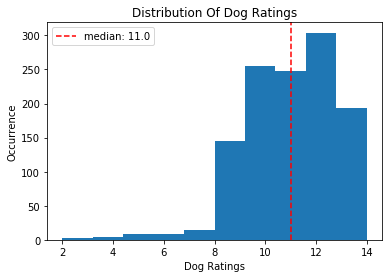

In [90]:
plt.hist(dog_r['rating'])
plt.axvline(dog_r['rating'].median(),color='r',linestyle='--',label='median: '+str(dog_r['rating'].median()))
plt.xlabel('Dog Ratings')
plt.ylabel('Occurrence')
plt.title('Distribution Of Dog Ratings')
plt.legend()
plt.show();

#### 2. What are the top 10 breeds based on the image predictor?

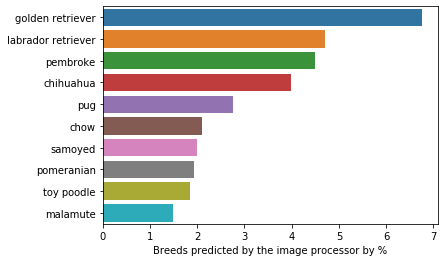

In [91]:
top5_breed=dog_rating.pred_breed.value_counts()[:10]
top5_breed=top5_breed/len(dog_rating)*100
sns.barplot(x=top5_breed,y=top5_breed.index)
plt.xlabel('Breeds predicted by the image processor by %');

##### 98%+ of users accessed via Twitter for Iphone app, only less than 2% used other apps

#### 3. What are the stages of these dogs?

In [92]:
df1=dog_rating.query('stage==["puppo","doggo","pupper","floofer"]')

In [93]:
stage=(df1.stage.value_counts()[:4])/len(df1)*100
stage.sort_values(ascending=False,inplace=True)

In [94]:
stage

pupper     68.350168
doggo      21.548822
puppo      7.744108 
floofer    2.356902 
Name: stage, dtype: float64

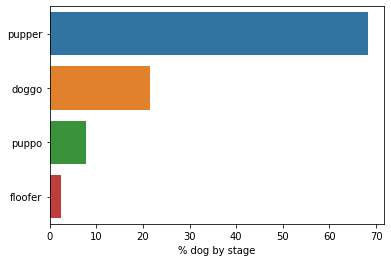

In [95]:
sns.barplot(x=stage,y=list(stage.index))
plt.xlabel('% dog by stage')
plt.show();

##### Among tweets which contain stage information, the majority (68%) concern puppers.

#### 4. What is the relationship between rating and the number of retweets or rating and the number of favorites,with only the dog photos counted?

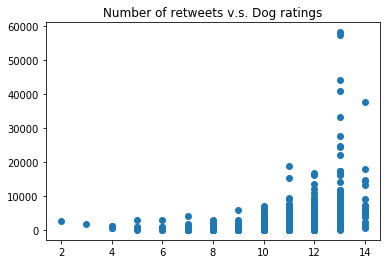

In [96]:
plt.scatter('rating','retweet_count',data=dog_rating.query('dog_or_not=="Yes"'))
plt.title('Number of retweets v.s. Dog ratings')
plt.show();

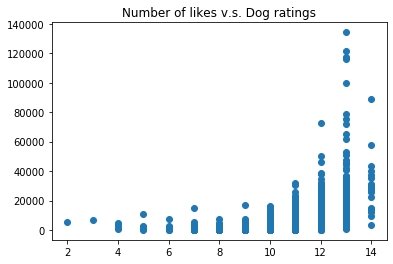

In [97]:
plt.scatter('rating','favorite_count',data=dog_rating.query('dog_or_not=="Yes"'))
plt.title('Number of likes v.s. Dog ratings')
plt.show();

#### 5. How do users access their twitter accounts?

In [98]:
source=dog_rating.groupby(['source']).count()['tweet_id']/len(dog_rating)*100
source

source
TweetDeck             0.460123 
Twitter Web Client    1.431493 
Twitter for iPhone    98.108384
Name: tweet_id, dtype: float64

#### 6. When were these tweets posted during the day?

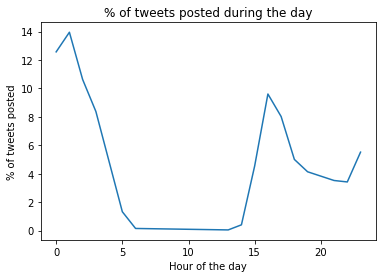

In [101]:
t=(pd.DatetimeIndex(dog_rating.timestamp).hour.value_counts().sort_index())/len(dog_rating)*100
plt.plot(t.index,t)
plt.xlabel('Hour of the day')
plt.ylabel('% of tweets posted')
plt.title('% of tweets posted during the day');

#### 7. What are the number of tweets per month?

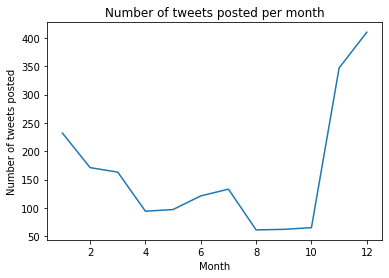

In [102]:
m=pd.DatetimeIndex(dog_rating.timestamp).month.value_counts().sort_index()
plt.plot(m.index,m)
plt.xlabel('Month')
plt.ylabel('Number of tweets posted')
plt.title('Number of tweets posted per month');

#### 8. What are the most popular dog names?

In [105]:
dog_rating.query('name!="None"').name.value_counts()[:10]

Oliver     10
Cooper     10
Charlie    10
Penny      9 
Lucy       9 
Tucker     9 
Winston    8 
Sadie      8 
Lola       7 
Daisy      7 
Name: name, dtype: int64

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

<a id='s'></a>
### Summary

##### I have performed data wrangling on three datesets which contain messy and untidy WeRateDogs data in this project. The clean data is saved as `twitter_archive_master.csv`. Please refer to 'act_report 'for analysis and insights into final data and wrangle_report for data wrangling steps.
